In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sm

In [3]:
train = pd.read_csv(r"D:\GreatLearning\Datasets\Customer Propensity To Purchase\training_sample.csv")

In [4]:
test = pd.read_csv(r"D:\GreatLearning\Datasets\Customer Propensity To Purchase\testing_sample.csv")

In [5]:
data = train.copy()

In [6]:
data.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
UserID                     455401 non-null object
basket_icon_click          455401 non-null int64
basket_add_list            455401 non-null int64
basket_add_detail          455401 non-null int64
sort_by                    455401 non-null int64
image_picker               455401 non-null int64
account_page_click         455401 non-null int64
promo_banner_click         455401 non-null int64
detail_wishlist_add        455401 non-null int64
list_size_dropdown         455401 non-null int64
closed_minibasket_click    455401 non-null int64
checked_delivery_detail    455401 non-null int64
checked_returns_detail     455401 non-null int64
sign_in                    455401 non-null int64
saw_checkout               455401 non-null int64
saw_sizecharts             455401 non-null int64
saw_delivery               455401 non-null int64
saw_account_upgrade        455401 non-null int64
saw_ho

In [8]:
x = data.drop(['ordered','UserID'],axis=1)
y = data['ordered']

In [9]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3,random_state = 42)

In [10]:
params1 = {'n_estimators':400,
          'min_samples_split':200,
           'min_samples_leaf':3
        }

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
pred_rf=rf.predict(xtest)

In [12]:
from sklearn.metrics import r2_score
print(r2_score(y_true=ytest, y_pred=pred_rf))
print(f'R^2 score:{rf.score(xtrain,ytrain)}')
print(f'R^2 score:{rf.score(xtest,ytest)}')

0.8210610566547718
R^2 score:0.9941934876717485
R^2 score:0.9928927470886614


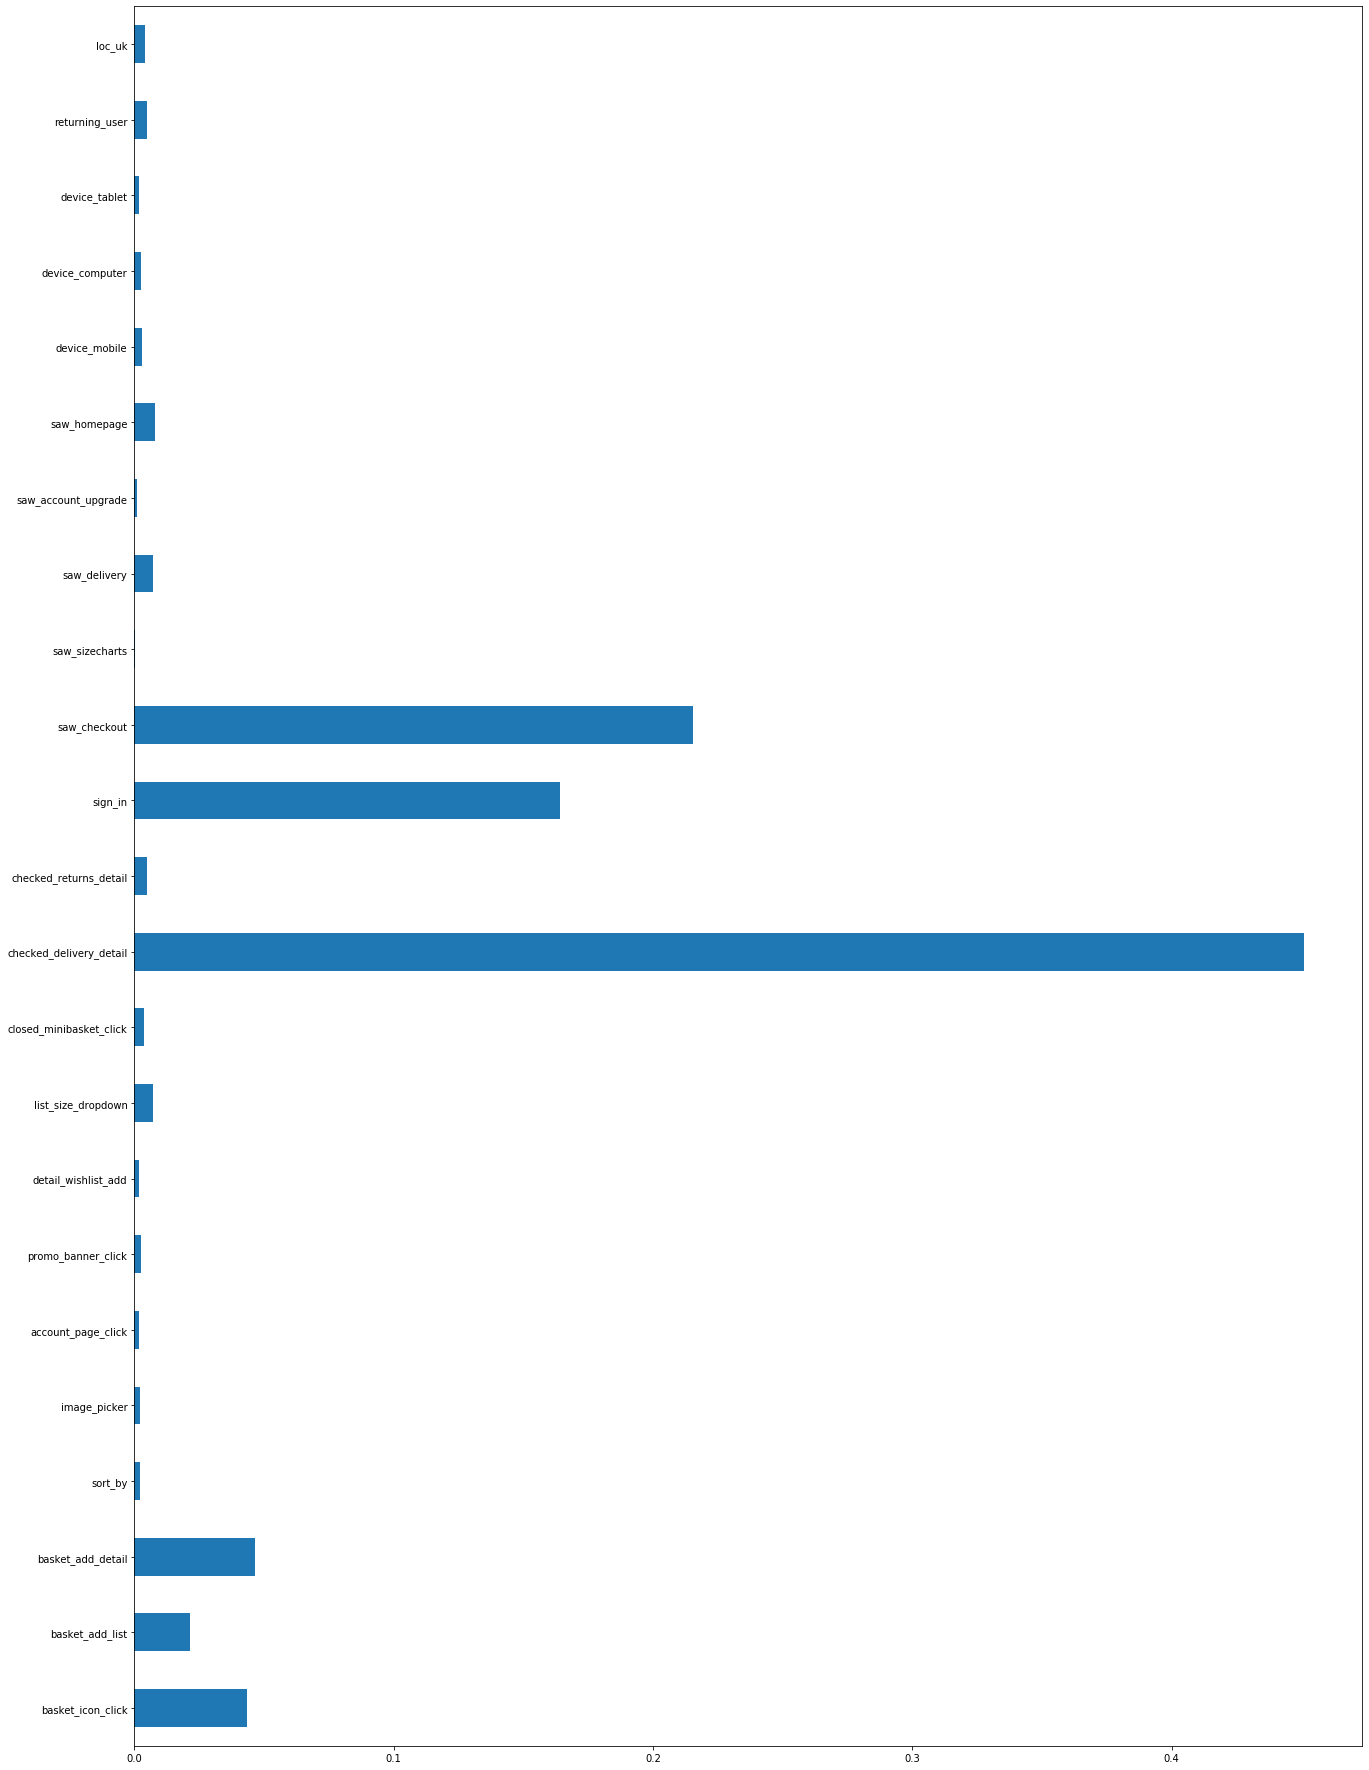

In [13]:
plt.figure(figsize=(22,32))
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)

feat_importances.plot(kind='barh')

In [25]:
import xgboost as xgb

In [26]:
from xgboost.sklearn import XGBClassifier 
xgb=XGBClassifier() 
preds_xgb=xgb.fit(xtrain,ytrain).predict(xtest)

In [27]:
from sklearn.metrics import r2_score
print(r2_score(y_true=ytest, y_pred=preds_xgb))
print(f'R^2 score:{rf.score(xtrain,ytrain)}')
print(f'R^2 score:{rf.score(xtest,ytest)}')

0.8243781534418101
R^2 score:0.9941934876717485
R^2 score:0.9928927470886614


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [15]:
calc_vif(x)

,variables,VIF
0,basket_icon_click,2.047719
1,basket_add_list,1.674745
2,basket_add_detail,1.780923
3,sort_by,1.185449
4,image_picker,1.138775
5,account_page_click,1.130253
6,promo_banner_click,1.042587
7,detail_wishlist_add,1.066770
8,list_size_dropdown,1.765275
9,closed_minibasket_click,1.151321


In [16]:
feat_importances

basket_icon_click          0.043534
basket_add_list            0.021282
basket_add_detail          0.046661
sort_by                    0.002282
image_picker               0.002275
account_page_click         0.001684
promo_banner_click         0.002393
detail_wishlist_add        0.001639
list_size_dropdown         0.007102
closed_minibasket_click    0.003677
checked_delivery_detail    0.450924
checked_returns_detail     0.004876
sign_in                    0.163983
saw_checkout               0.215535
saw_sizecharts             0.000223
saw_delivery               0.007179
saw_account_upgrade        0.001038
saw_homepage               0.008011
device_mobile              0.002835
device_computer            0.002494
device_tablet              0.001649
returning_user             0.004815
loc_uk                     0.003905
dtype: float64

In [ ]:
vif = calc_vif(x).copy()